In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')

from tqdm import tqdm
tqdm.pandas()


In [2]:
train_data = pd.read_csv("state-farm-data/exercise_40_train.csv")
train_data.shape

(40000, 101)

In [3]:
y = train_data.pop('y')
y

0        0
1        1
2        1
3        0
4        0
        ..
39995    0
39996    0
39997    0
39998    0
39999    0
Name: y, Length: 40000, dtype: int64

In [4]:
y.value_counts() 

0    34197
1     5803
Name: y, dtype: int64

In [5]:
train_data.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61',
       'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71',
       'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81',
       'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91',
       'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100'],
      dtype='object')

In [6]:
train_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,$-908.650758424405,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,5-10 miles,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,$-1864.9622875143,6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,5-10 miles,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,$-543.187402955527,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,$-182.626380634258,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,-0.275406,90.769952,7.23012

### Check data types

Check that all numerical columns are the right type

In [7]:
train_data.dtypes.apply(lambda x: x in ('float64', 'int64'))

x1       True
x2       True
x3      False
x4       True
x5       True
        ...  
x96      True
x97      True
x98      True
x99     False
x100     True
Length: 100, dtype: bool

In [8]:
for col, dtype in train_data.dtypes.items():
    if dtype == 'object':
        print(col, dtype)
        print(train_data[col].value_counts())

x3 object
Wednesday    4930
Monday       4144
Friday       3975
Tuesday      3915
Sunday       3610
Saturday     3596
Tue          2948
Thursday     2791
Mon          2200
Wed          2043
Sat          1787
Thur         1643
Fri          1620
Sun           798
Name: x3, dtype: int64
x7 object
0.0022%     193
0.0011%     189
-0.0016%    185
6e-04%      182
0.0019%     181
           ... 
-0.0392%      1
0.0331%       1
0.0304%       1
0.0337%       1
-0.0293%      1
Name: x7, Length: 663, dtype: int64
x19 object
$-908.650758424405    1
$-134.276901558584    1
$365.413631147425     1
$-860.920849673214    1
$335.677771123234     1
                     ..
$-285.734411382017    1
$564.04903720795      1
$-318.51115066272     1
$-802.39093909306     1
$96.0017151741518     1
Name: x19, Length: 40000, dtype: int64
x24 object
female    18158
male      17986
Name: x24, dtype: int64
x31 object
no     34022
yes     5978
Name: x31, dtype: int64
x33 object
California        3393
Texas            

- some columns only have 1 value and provide no information
- drop those columns



In [9]:
# iter through columns
for c, series in train_data.items():
    if len(series.unique()) < 2:
        print(c)
        print(series.describe())

x39
count          40000
unique             1
top       5-10 miles
freq           40000
Name: x39, dtype: object


In [10]:
train_data.drop('x39', inplace=True, axis=1)

### Parse numerical values

- Column 19 has currency that needs to be converted to numeric

- Column 7 has percentage values that needs to be converted to float

In [11]:
train_data['x19'].head()

0    $-908.650758424405
1     $-1864.9622875143
2    $-543.187402955527
3    $-182.626380634258
4     $967.007090837503
Name: x19, dtype: object

In [12]:
# column 19 has dollar values
train_data['x19'] = train_data['x19'].apply(lambda x: float(x.replace('$', '')))

In [13]:
train_data['x19'].dtype

dtype('float64')

In [14]:
train_data['x19'].describe()

count    40000.000000
mean        -5.028013
std       1001.312630
min      -4166.106634
25%       -682.694719
50%          0.692233
75%        670.404666
max       3867.314061
Name: x19, dtype: float64

Text(0.5, 1.0, 'Column: x19')

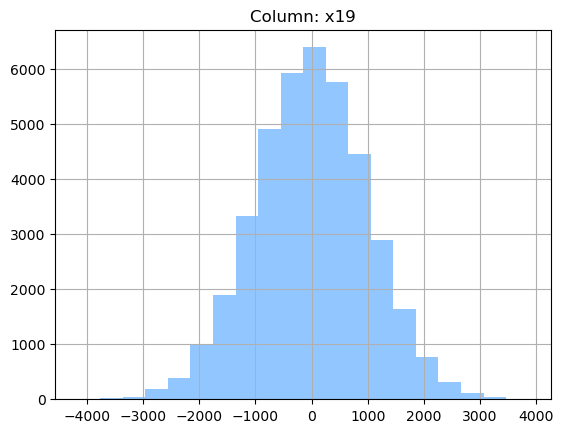

In [15]:
# looks very `normal`
ax = train_data['x19'].hist(bins=20)
ax.set_title("Column: x19")

In [16]:
train_data['x7'].head()

0     0.0062%
1     0.0064%
2     -8e-04%
3    -0.0057%
4     0.0109%
Name: x7, dtype: object

In [17]:
# column 7 appears to be a percentage value
train_data['x7'] = train_data['x7'].apply(lambda x: float(x.replace('%', '')))

In [18]:
train_data['x7'].dtype

dtype('float64')

Text(0.5, 1.0, 'Column: x7')

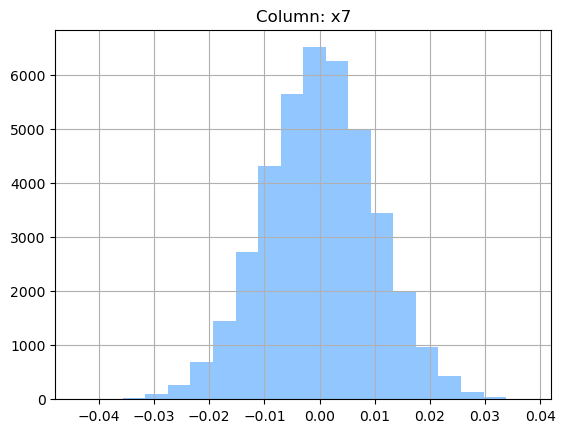

In [19]:
# looks very `normal`
ax = train_data['x7'].hist(bins=20)
ax.set_title("Column: x7")

### Standardize Days in the Week

- Column 3 has weekdays, but they're written in a non-standard day

In [20]:
train_data['x3'].value_counts()

Wednesday    4930
Monday       4144
Friday       3975
Tuesday      3915
Sunday       3610
Saturday     3596
Tue          2948
Thursday     2791
Mon          2200
Wed          2043
Sat          1787
Thur         1643
Fri          1620
Sun           798
Name: x3, dtype: int64

In [21]:
_weekday_mapping = {'Mon': 'Monday', 'Tue': 'Tuesday', 'Wed': 'Wednesday', 'Thur': 'Thursday', 'Fri': 'Friday', 'Sat': 'Saturday', 'Sun': 'Sunday', 'Monday': 'Monday', 'Tuesday': 'Tuesday', 'Wednesday': 'Wednesday', 'Thursday': 'Thursday', 'Friday': 'Friday', 'Saturday': 'Saturday', 'Sunday': 'Sunday'}
train_data['x3'] = train_data['x3'].map(_weekday_mapping)

### Column 99

Col 99 has only 1 unique value `yes`, and else is populated with missing values. This could be a non-significant column, but could also provide signal if you convert it to `1` vs `0`. I will keep just to see if it provides any additional information.

In [22]:
train_data['x99'].value_counts()

yes    27164
Name: x99, dtype: int64

In [23]:
train_data['x99'].isnull().mean()

0.3209

In [24]:
train_data['x99'] = train_data['x99'].map({'yes': 1}).fillna(0)

## Missing Values

Some columns have a lot of missing values

In [25]:
cols_missing_vals = train_data.isnull().mean().sort_values(ascending=False)

In [26]:
cols_missing_vals[cols_missing_vals > 0].index

Index(['x44', 'x57', 'x30', 'x55', 'x52', 'x74', 'x49', 'x54', 'x95', 'x78',
       'x16', 'x89', 'x14', 'x42', 'x85', 'x41', 'x77', 'x45', 'x61', 'x33',
       'x96', 'x91', 'x80', 'x76', 'x75', 'x11', 'x64', 'x24', 'x92', 'x26',
       'x79', 'x83', 'x5', 'x67', 'x63', 'x86', 'x38', 'x22', 'x68', 'x94',
       'x88'],
      dtype='object')

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder, RobustScaler
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import FunctionTransformer, Normalizer
from sklearn.pipeline import Pipeline


In [28]:
categorical_features = train_data.columns[train_data.dtypes == 'object']
categorical_features

Index(['x3', 'x24', 'x31', 'x33', 'x60', 'x65', 'x77', 'x93'], dtype='object')

In [29]:
for col in categorical_features:
    print(col)
    print(train_data[col].isnull().sum())
    if (train_data[col].isnull().sum() > 0):
        print(train_data[col])

x3
0
x24
3856
0        female
1          male
2          male
3          male
4          male
          ...  
39995    female
39996      male
39997      male
39998      male
39999       NaN
Name: x24, Length: 40000, dtype: object
x31
0
x33
7171
0         Colorado
1        Tennessee
2            Texas
3        Minnesota
4         New York
           ...    
39995          NaN
39996     Illinois
39997          NaN
39998         Ohio
39999      Florida
Name: x33, Length: 40000, dtype: object
x60
0
x65
0
x77
9257
0        mercedes
1        mercedes
2          subaru
3          nissan
4          toyota
           ...   
39995         NaN
39996        ford
39997        ford
39998         NaN
39999      toyota
Name: x77, Length: 40000, dtype: object
x93
0


In [30]:
cols_missing_vals[categorical_features].sort_values(ascending=False)

x77    0.231425
x33    0.179275
x24    0.096400
x3     0.000000
x31    0.000000
x60    0.000000
x65    0.000000
x93    0.000000
dtype: float64

In [31]:
train_data[['x77', 'x33', 'x24']]

,x77,x33,x24
0,mercedes,Colorado,female
1,mercedes,Tennessee,male
2,subaru,Texas,male
3,nissan,Minnesota,male
4,toyota,New York,male
...,...,...,...
39995,NaN,NaN,female
39996,ford,Illinois,male
39997,ford,NaN,male
39998,NaN,Ohio,male


### Missing Values - Categorical Features

These features can be dealt without the need of imputation. We will one-hot encode and simply ignore missing values

In [32]:
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]
)

## Missing Values - Numerical Features

Impute them

In [33]:
numeric_features = train_data.columns[train_data.dtypes != 'object'].tolist()

In [34]:
cols_missing_vals[numeric_features].sort_values(ascending=False).head(20)

x44    0.856175
x57    0.811600
x30    0.808400
x55    0.442400
x52    0.404550
x74    0.322900
x49    0.320575
x54    0.318200
x95    0.315100
x78    0.284325
x16    0.280300
x89    0.267275
x14    0.246600
x42    0.243225
x85    0.242875
x41    0.237575
x45    0.200225
x61    0.182325
x96    0.165950
x91    0.131475
dtype: float64

Columns `x44`, `x57`, `x30` have too many more missing values than known values so drop them. Could have beneficial value, but I don't want to spend the time investigating the issue

The rest have be standardized and imputed

In [35]:
numeric_features = [c for c in numeric_features if c not in ('x44', 'x57', 'x30')]

In [36]:
def normalize_min_max(array: np.array):
    _ix = pd.isnull(array)
    X = array[~_ix]
    X_new = (array - X.min())/(X.max() - X.min())
    return X_new

min_max_transformer = FunctionTransformer(normalize_min_max)

In [37]:
numeric_transformer = Pipeline(
    steps=[('min_max', min_max_transformer), ('impute', SimpleImputer()), ("scaler", RobustScaler())]
)


In [38]:
ct = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [39]:
X_transform = ct.fit_transform(train_data)

In [40]:
X_transform

array([[-1.01234575, -0.90003319,  0.51934187, ...,  0.        ,
         1.        ,  0.        ],
       [-0.16224397, -0.73523613,  0.71507912, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.579398  , -0.37827159,  0.06926494, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.43761894, -1.0090043 , -0.28192267, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.40615585,  0.12934435,  0.20667702, ...,  1.        ,
         1.        ,  0.        ],
       [-0.11268694, -1.64799574, -0.56436898, ...,  0.        ,
         1.        ,  0.        ]])

In [41]:
cols = ['u{}'.format(i) for i in range(X_transform.shape[1])]
train_df = pd.DataFrame(X_transform, columns = cols)
#test_df = pd.DataFrame(X_test, columns = cols)

In [42]:
train_df.head()

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13,u14,u15,u16,u17,u18,u19,u20,u21,u22,u23,u24,u25,u26,u27,u28,u29,u30,u31,u32,u33,u34,u35,u36,u37,u38,u39,u40,u41,u42,u43,u44,u45,u46,u47,u48,u49,u50,u51,u52,u53,u54,u55,u56,u57,u58,u59,u60,u61,u62,u63,u64,u65,u66,u67,u68,u69,u70,u71,u72,u73,u74,u75,u76,u77,u78,u79,u80,u81,u82,u83,u84,u85,u86,u87,u88,u89,u90,u91,u92,u93,u94,u95,u96,u97,u98,u99,u100,u101,u102,u103,u104,u105,u106,u107,u108,u109,u110,u111,u112,u113,u114,u115,u116,u117,u118,u119,u120,u121,u122,u123,u124,u125,u126,u127,u128,u129,u130,u131,u132,u133,u134,u135,u136,u137,u138,u139,u140,u141,u142,u143,u144,u145,u146,u147,u148,u149,u150,u151,u152,u153,u154,u155,u156,u157,u158,u159,u160,u161,u162,u163,u164,u165,u166,u167,u168,u169,u170,u171,u172,u173,u174,u175,u176,u177,u178
0,-1.012346,-0.900033,0.519342,-0.821246,-0.866901,0.451852,0.111726,-0.274356,0.492414,0.638013,0.242841,0.411319,1.066967,-0.303105,1.346389,-1.212265,-0.180563,-0.672044,0.490825,2.370101,1.683211,0.776491,-0.309187,1.198976,-0.669024,-0.047953,-0.090999,-0.538120,-0.802198,1.088413,-0.093812,0.314854,0.000000,0.526673,0.000000,0.215665,0.517483,-1.093066,0.092687,0.556010,-0.235928,3.035001,-0.388518,0.675411,0.892077,0.323802,0.177366,0.000000,-1.047791,0.000000,0.0,-0.036640,1.061889,0.701678,-0.534170,0.612610,-0.05556,0.086543,0.278662,-0.289079,-0.097083,0.411401,0.331160,0.000000,0.074467,0.000000,0.415838,0.000000,0.340474,-0.234041,1.006351,-1.212041,-0.090578,2.930147,-0.351703,-0.096406,0.465323,-0.056773,-0.144662,-0.243170,-0.747592,0.825916,0.000000,-0.167161,-0.883889,0.0,0.0,0.600173,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.162244,-0.735236,0.715079,0.559103,-0.417889,0.466667,0.608435,0.408109,0.670805,-1.056712,-0.249567,-0.600532,0.000000,-0.593253,-0.660292,0.157508,-0.760861,-1.378801,0.379586,-0.097093,0.668138,0.107683,-0.153075,0.841521,-0.930336,2.194068,0.276594,0.539029,-0.641323,-1.200833,-1.505232,0.988089,-0.141823,-0.588491,-0.773512,-1.542915,-0.954718,1.659637,0.456436,-2.042343,-0.531774,0.000000,0.979001,0.311761,0.000000,0.592058,0.000000,0.000000,0.234708,0.000000,0.0,-0.638330,0.107736,0.034599,-0.318242,0.374401,0.00000,2.530527,-0.075385,0.643377,0.000000,-0.357285,0.260974,-1.691231,-0.389256,-1.386683,-2.153695,-0.100745,0.519963,0.798704,0.519660,0.355494,0.000000,0.263386,-0.566084,0.791731,0.572613,-0.123432,0.446957,0.399134,1.230248,-0.337803,3.372535,0.000000,0.190839,1.0,0.0,0.171213,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.579398,-0.378272,0.069265,0.220299,0.382684,-0.066667,0.485687,-0.689876,-1.246702,-0.307387,-0.305436,-0.668948,-0.477576,0.097654,-1.663571,0.194631,-0.330817,-0.401951,-0.246896,0.175006,-0.001974,-0.092726,-0.156859,-0.192504,0.553583,-0.370506,1.724764,1.462062,0.474142,-0.585170,-0.032535,-0.072201,-0.156804,-0.094911,0.078374,0.185722,-0.255886,-1.129815,-1.076249,0.036977,0.534099,-1.731542,1.296671,0.202843,3.414929,-1.577404,2.023735,0.000000,1.869347,-0.294351,0.0,-0.785826,-0.761959,-0.131615,0.723425,-0.013710,0.00000,0.472338,-0.440378,0.631760,0.000000,-0.196726,0.575379,0.206355,-0.109924,-1.903229,1.561863,0.000000,-1.342085,-1.254543,0.010191,-0.387013,0.000000,0.000000,0.664530,0.418362,-0.600231,0.000000,0.633657,1.254033,-0.893637,0.264178,0.000000,-1.096624,-0.815448,0.0,0.0,1.323539,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.

In [43]:
#train_df.loc[train_df['x3'].isnull()] # nulls seem normal

In [44]:
train_df = pd.concat([train_df, y], axis=1)
train_df.shape

(40000, 180)

In [45]:
train_df.to_csv("state-farm-data/clean_train_df.csv")

## Test - Transform Test data to new features

In [46]:
test_data = pd.read_csv("state-farm-data/exercise_40_test.csv")